In [92]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [93]:
def linear_func(x, er):
    res = []
    for el, e in zip(x, er):
        res.append(el + e)
    return res

def square_func(x, er):
    res = []
    for el, e in zip(x, er):
        res.append(el**2 + e)
    return res

def log_func(x, er):
    res = []
    for el, e in zip(x, er):
        res.append(np.log(el) + e)
    return res

In [94]:
xx = np.arange(1., 101., 2)
np.random.seed(seed=123)
e_array = np.random.uniform(-10., 10., len(xx))
split_point = int(3.*len(xx)/4.)
x_train = xx[:split_point]
x_test = xx[split_point:]
e_train = e_array[:split_point]
e_test = e_array[split_point:]

## Построение линейного регрессора

In [95]:
# Костыль регрессора, та-дааааа
from scipy import linalg

def linear_reg(x, y):
    Y = np.matrix(y).transpose()
    kx = [1. for el in x]
    At = np.matrix([kx, x])
    A = At.transpose()
    w = np.dot(np.dot(linalg.inv(np.dot(At, A)), At), Y)
    w1 = np.array(w).reshape(-1,)[0]
    w2 = np.array(w).reshape(-1,)[1]
    y1 = [w1 + w2*el for el in x]
    pre_sse = [(el1-el2)**2 for el1, el2 in zip(y, y1)]
    sse = sum(pre_sse)/len(y)
    return y1, np.std(y1), sse

# Графики
def ploto(x, y, y1):
    plt.plot(x, y, 'bo')
    plt.plot(x, y1, 'red')
    for el1, el2, el3 in zip(x, y, y1):
        plt.plot([el1, el1], [el2, el3], 'black')
    plt.show()
    
def fluct(x, y, y1):
    print('Ошибка на итерациях')
    error = [el1-el2 for el1, el2 in zip(y, y1)]
    plt.plot(np.arange(1, len(x)+1, 1), error)
    plt.show()

## Анализ ошибки

In [112]:
def err():
    print('Зависимость стандартного отклонения от количества объектов')
    v_train = []
    v_test = []
    r_train = []
    r_test = []
    k = 10
    for i in range(k):
        x = np.arange(1., 101., 2./float(i+1))
        np.random.seed(seed=123)
        split_point = int(3.*len(x)/4.)
        x_train = x[:split_point]
        x_test = x[split_point:]
        r_train.append(len(x_train))
        r_test.append(len(x_test))
        e = np.random.uniform(-10., 10., len(x))
        e_train = e[:split_point]
        e_test = e[split_point:]
        y_train = linear_func(x_train, e_train)
        y_test = linear_func(x_test, e_test)
        sse_train = linear_reg(x_train, y_train)
        sse_test = linear_reg(x_test, y_test)
        v_train.append(sse_train[1])
        v_test.append(sse_test[1])
    print('\n')
    print('На обучении')
    plt.plot(r_train, v_train)
    plt.show()
    print('\n')
    print('На тесте')
    plt.plot(r_test, v_train)
    plt.show()

## Линейная функция

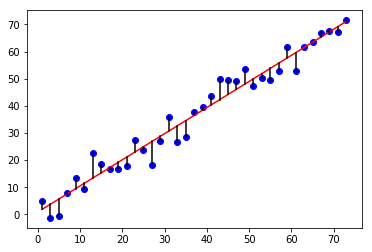

Стандартное отклонение 20.55
Среднеквадратичная ошибка 17.48


Ошибка на итерациях


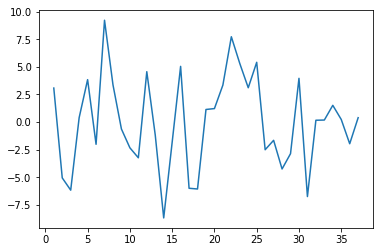

Зависимость стандартного отклонения от количества объектов


На обучении


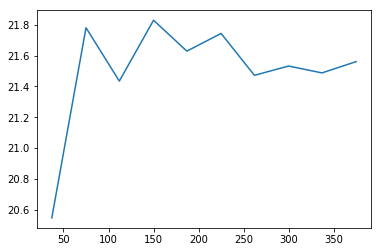



На тесте


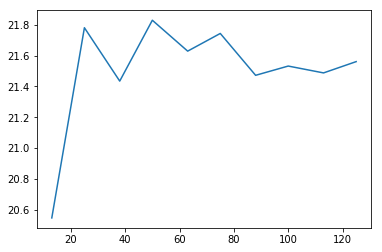

In [113]:
y_lin = linear_func(x_train, e_train)
sse_lin = linear_reg(x_train, y_lin)
ploto(x_train, y_lin, sse_lin[0])
print('Стандартное отклонение %.2f' % sse_lin[1])
print('Среднеквадратичная ошибка %.2f' % sse_lin[2])
print('\n')
fluct(x_train, y_lin, sse_lin[0])
err()

## Квадратичная функция

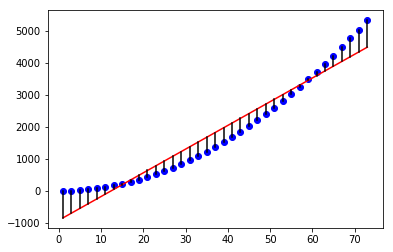

Стандартное отклонение 1579.40
Среднеквадратичная ошибка 165741.05


Ошибка на итерациях


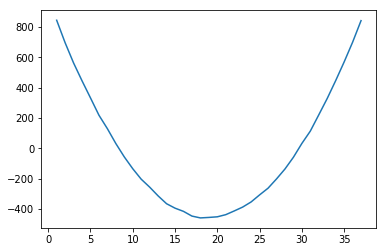

Зависимость стандартного отклонения от количества объектов


На обучении


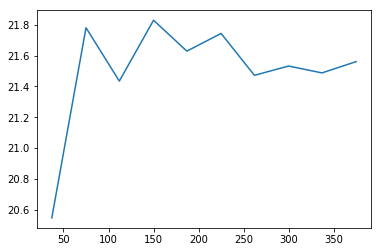



На тесте


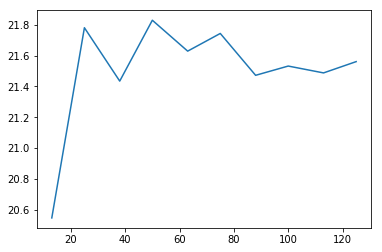

In [114]:
y_sqr = square_func(x_train, e_train)
sse_sqr = linear_reg(x_train, y_sqr)
ploto(x_train, y_sqr, sse_sqr[0])
print('Стандартное отклонение %.2f' % sse_sqr[1])
print('Среднеквадратичная ошибка %.2f' % sse_sqr[2])
print('\n')
fluct(x_train, y_sqr, sse_sqr[0])
err()

## Логарифмическая функция

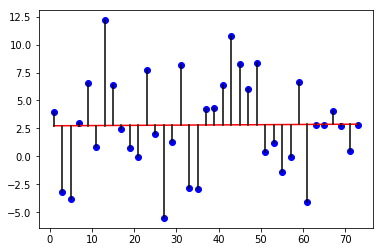

Стандартное отклонение 0.04
Среднеквадратичная ошибка 17.80


Ошибка на итерациях


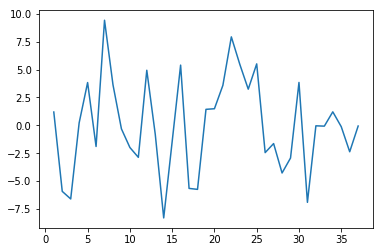

Зависимость стандартного отклонения от количества объектов


На обучении


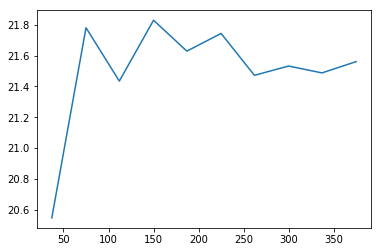



На тесте


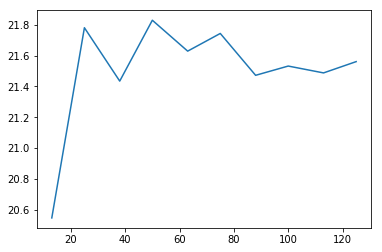

In [115]:
y_log = log_func(x_train, e_train)
sse_log = linear_reg(x_train, y_log)
ploto(x_train, y_log, sse_log[0])
print('Стандартное отклонение %.2f' % sse_log[1])
print('Среднеквадратичная ошибка %.2f' % sse_log[2])
print('\n')
fluct(x_train, y_log, sse_log[0])
err()